# Test OpenCV Video

`pip install opencv-python`

`pip install numpy`

Se hará un demo para probar OpenCV en el que se creará y guardará un video simple en el que un cuadrado blanco se mueva en un fondo gris. Este mismo video luego se usará para testear de forma rápida métodos de segmentación de fondo. Por ahora se limitará a cargar el video como una matriz (cada columna representando un frame) y se calcularán las normas nucleares y de frobenius.

## Crear Video

In [30]:
import cv2
import numpy as np

fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('test.avi', fourcc, 20.0, (100,100))

try:
    print('Creating Video')
    for i in range(91):
        new = np.zeros((100,100)) + 50
        new[50:60, i:i+10] = 255
        new = new.astype(np.uint8)
        new = cv2.cvtColor(new, cv2.COLOR_GRAY2BGR)
        out.write(new)
    
finally:
    print('Releasing Video')
    out.release()

Creating Video
Releasing Video


## Obtener datos del video como matriz

Se cargará el video creado en la parte anterior como si fuese una matriz (es decir, cada columna representa un frame) y se extraerá información de esta. Particularmente, se extraerá la norma nuclear y de frobenius.

Se asume que el procesamiento se hará en escala de grises

In [96]:
import cv2
import numpy as np

def load_video(path):
    video = cv2.VideoCapture(path)

    M = None # Video como matriz

    try: 
        while video.isOpened():
            ret, frame = video.read()
            
            if ret:
                frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
                if M is None:
                    M = frame.flatten()
                else:
                    M = np.column_stack((M, frame.flatten()))
            else:
                break
    finally:
        video.release()
    
    return M

In [97]:
M = load_video('test.avi')

In [98]:
# Norma nuclear
np.linalg.norm(M, ord='nuc')

156495.37021996052

In [99]:
# Norma de Frobenius
np.linalg.norm(M, ord='fro')

50695.531055508232

### Visualizacion de los frames

Frame 0:

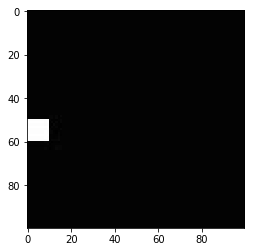

In [104]:
plt.imshow(M[:, 0].reshape(100,100), cmap='gray')

Frame 50:

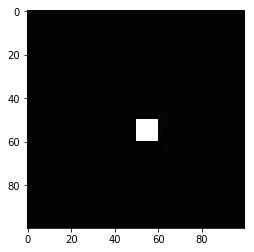

In [105]:
plt.imshow(M[:, 50].reshape(100,100), cmap='gray')